In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.pandas.set_option('display.max_column',None)

In [306]:
auto_df = pd.read_csv('clean_df.csv')
auto_df.shape

(201, 30)

In [327]:
auto_df.isna().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
fuel-type-diesel     0
fuel-type-gas        0
dtype: int64

In [307]:
auto_df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


**Univariate Visualizations to understand distribution of a single variable**

For a continuous response, it is important to understand whether the response has symmetric, skewed, multiple peaked distribution.

The distribution of the response as well as its variation provides a
lower bound of the expectations of model performance.

If a model has meaningful predictors, then the residuals from the model should have less variance than the response.



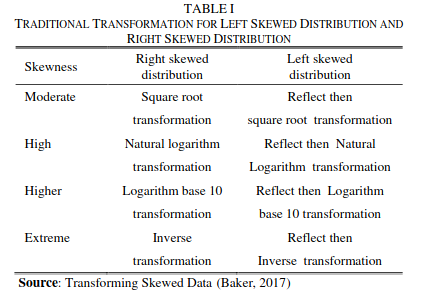

**Box plot**



A variable that has a symmetric distribution has equal spacing across the quartiles making the box and whiskers also appear symmetric.

Consists of the minimum, lower quartile, median, upper quartile and maximum of the data.

A drawback of the box plot is that it is not effective at identifying distributions that
have multiple peaks or modes

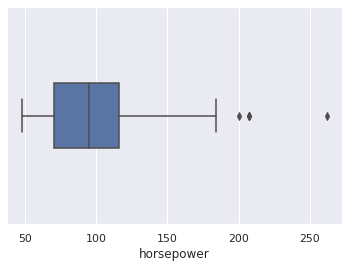

In [308]:
#Box plot of horsepower
sns.boxplot(x=auto_df['horsepower'],width=.3)
plt.xlabel('horsepower')
plt.show()

**Histogram**

Can reveal additonal properties about the distribution of the variable

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

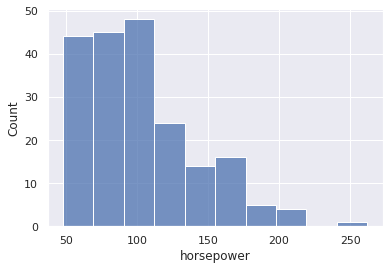

In [309]:
#Histogram of the horsepower
sns.histplot(auto_df['horsepower'], bins=10)

**Violin Plot**

Compact view of distribution with box-plot and histrogram-like characteristics

Created by generating a density or distribution of the data and its mirror image.

<AxesSubplot:xlabel='horsepower'>

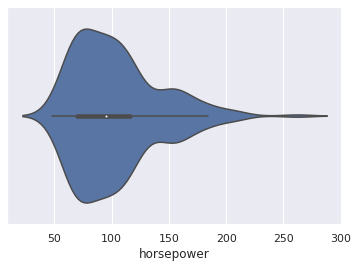

In [310]:
sns.violinplot(x= auto_df['horsepower'])

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

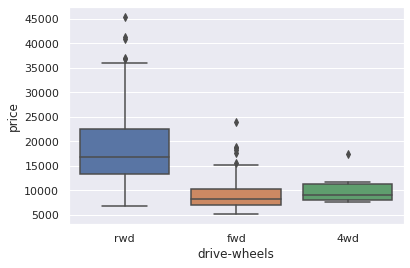

In [313]:
sns.boxplot(x= 'drive-wheels',y='price',data=auto_df)

**Multivariate Visualization**

**Scatter Plots**

Assess the relationship between variables and responses

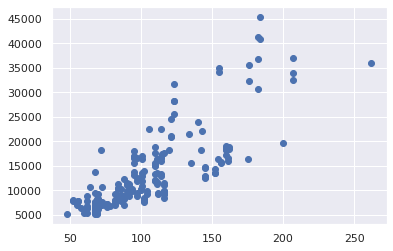

In [314]:
#Variable-Response
plt.scatter(auto_df['horsepower'],auto_df['price'])

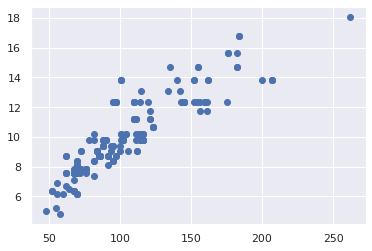

In [315]:
#Variable-Variable
plt.scatter(auto_df['horsepower'],auto_df['city-L/100km'])

**Line Plots**

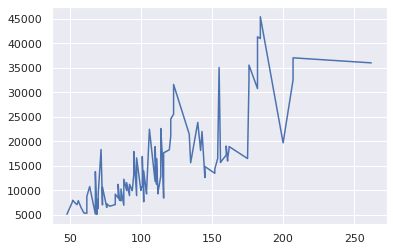

In [326]:
a = auto_df['horsepower']
b = auto_df['price']

ax,by = zip(*sorted((zip(a,b))))

plt.plot(ax,by)

**HeatMaps**

A versatile plot that can be created utilizing almost any type of predictor 

<AxesSubplot:xlabel='drive-wheels', ylabel='make'>

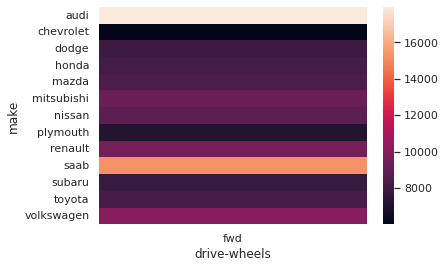

In [323]:
#Heatmap of mean frontwhelled car price per brand
foo = auto_df[auto_df['drive-wheels'] == 'fwd']
foo = foo[['drive-wheels','make','price']]
foo = foo.groupby(['drive-wheels','make']).mean()

foo = pd.pivot_table(foo, values='price', index=['make'], columns='drive-wheels')

sns.heatmap(foo)

**Correlation Matrix**

High degree of correlation between variables clear indicator of redundant information

In [324]:
auto_df.corr()


,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
